# Comparação das expectativas de vida nos distritos do município de São Paulo

In [158]:
import pandas as pd
import matplotlib.pyplot as pl

## 1. Preparando os dados

### 1.1. Carregando os dados

Os dados brutos -- isto é, originais e sem alterações -- podem ser obtidos aqui: <http://tabnet.saude.prefeitura.sp.gov.br/cgi/deftohtm3.exe?secretarias/saude/TABNET/SIM/obito.def>. 

Como linha, escolhemos "Idade detalhada". Como coluna, "Distrito Admin residência". E como conteúdo, "Óbitos residentes MSP". 
Em período disponível, apertamos a tecla CTRL para selecionar múltilos anos (de 2010 a 2019).

In [4]:
# Carregando os dados brutos de um arquivo CSV:
bruto_df = pd.read_csv('dados/brutos/obitos-resid_por_idade_distrito-resid_2010-2019.csv', sep=';', skiprows=3, skipfooter=6, encoding='latin-1', engine='python')

In [10]:
# Visualizando os dados:
bruto_df

,Idade Detalhada,Água Rasa,Alto de Pinheiros,Anhanguera,Aricanduva,Artur Alvim,Barra Funda,Bela Vista,Belém,Bom Retiro,...,Vila Jacuí,Vila Leopoldina,Vila Maria,Vila Mariana,Vila Matilde,Vila Medeiros,Vila Prudente,Vila Sônia,Ignorado,Total
0,< 1 hora,5,-,6,4,10,-,1,4,3,...,9,2,17,-,6,6,11,5,5,740
1,1 hora,2,-,7,4,13,1,2,3,2,...,15,-,11,8,8,12,8,8,6,910
2,2 horas,1,1,3,1,1,-,3,1,1,...,5,-,6,1,-,7,2,2,-,252
3,3 horas,3,-,2,2,2,2,-,2,1,...,4,-,5,1,-,1,5,2,-,165
4,4 horas,1,-,4,-,3,1,-,2,1,...,3,-,3,-,1,-,1,-,-,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
180,115 anos,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1
181,116 anos,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1
182,127 anos,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1
183,Ignorado,1,-,2,1,-,1,2,2,3,...,1,-,4,3,-,2,1,-,21,142


### 1.2. Limpando os dados

Como vamos calcular a expectativa de vida a partir dos dados, não nos interessa as duas últimas linhas, que mostram informações que não estão associadas à idade das pessoas no momento do óbito. A penúltima linha mostra a quantidade de óbitos sem informação de idade, enquanto que a segunda mostra o total de óbitos, independentemente da idade. Para retirar essas linhas, vamos utilizar o método `query`:

In [137]:
# Copiamos o DataFrame para uma nova variável, para manter os dados brutos inalterados:
limpo_df = bruto_df.copy()
# Retiramos as duas últimas linhas:
limpo_df = limpo_df.query('`Idade Detalhada` != "Ignorado" & `Idade Detalhada` != "Total"')
# Mostra o resultado:
limpo_df

,Idade Detalhada,Água Rasa,Alto de Pinheiros,Anhanguera,Aricanduva,Artur Alvim,Barra Funda,Bela Vista,Belém,Bom Retiro,...,Vila Jacuí,Vila Leopoldina,Vila Maria,Vila Mariana,Vila Matilde,Vila Medeiros,Vila Prudente,Vila Sônia,Ignorado,Total
0,< 1 hora,5,-,6,4,10,-,1,4,3,...,9,2,17,-,6,6,11,5,5,740
1,1 hora,2,-,7,4,13,1,2,3,2,...,15,-,11,8,8,12,8,8,6,910
2,2 horas,1,1,3,1,1,-,3,1,1,...,5,-,6,1,-,7,2,2,-,252
3,3 horas,3,-,2,2,2,2,-,2,1,...,4,-,5,1,-,1,5,2,-,165
4,4 horas,1,-,4,-,3,1,-,2,1,...,3,-,3,-,1,-,1,-,-,155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,113 anos,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,5
179,114 anos,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,2
180,115 anos,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1
181,116 anos,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,1


Note que as duas últimas colunas também apresentam o total de óbitos por idade (independentemente do distrito) e o número de óbitos sem registro do distrito de residência. Vamos retirar essas colunas utilizando um outro método de seleção de colunas, o `iloc`:

In [138]:
# Seleciona todas as linhas e todas as colunas, menos as duas últimas:
# (CUIDADO! Se você executar esta célula uma segunda vez, vai remover outras duas colunas)
limpo_df = limpo_df.iloc[:, :-2]
# Mostra o resultado:
limpo_df

,Idade Detalhada,Água Rasa,Alto de Pinheiros,Anhanguera,Aricanduva,Artur Alvim,Barra Funda,Bela Vista,Belém,Bom Retiro,...,Vila Formosa,Vila Guilherme,Vila Jacuí,Vila Leopoldina,Vila Maria,Vila Mariana,Vila Matilde,Vila Medeiros,Vila Prudente,Vila Sônia
0,< 1 hora,5,-,6,4,10,-,1,4,3,...,5,4,9,2,17,-,6,6,11,5
1,1 hora,2,-,7,4,13,1,2,3,2,...,11,4,15,-,11,8,8,12,8,8
2,2 horas,1,1,3,1,1,-,3,1,1,...,3,1,5,-,6,1,-,7,2,2
3,3 horas,3,-,2,2,2,2,-,2,1,...,-,1,4,-,5,1,-,1,5,2
4,4 horas,1,-,4,-,3,1,-,2,1,...,-,-,3,-,3,-,1,-,1,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,113 anos,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
179,114 anos,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
180,115 anos,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
181,116 anos,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-


Outro problema que temos é que, quando as mortes não existem, elas são representadas por "-" ao invés de zero. Além disso (e por causa disso), as colunas são do tipo `string`:

In [139]:
type(limpo_df.loc[0, 'Água Rasa'])

str

Vamos resolver esses dois problemas:

In [140]:
# Pegamos a lista de colunas da tabela:
colunas = limpo_df.columns
# Passamos por todas, menos a primeira (que é a idade):
for col in colunas[1:]:
    limpo_df[col] = limpo_df[col].str.replace('-', '0', regex=False).astype(int)
# Mostra o resultado:
limpo_df

,Idade Detalhada,Água Rasa,Alto de Pinheiros,Anhanguera,Aricanduva,Artur Alvim,Barra Funda,Bela Vista,Belém,Bom Retiro,...,Vila Formosa,Vila Guilherme,Vila Jacuí,Vila Leopoldina,Vila Maria,Vila Mariana,Vila Matilde,Vila Medeiros,Vila Prudente,Vila Sônia
0,< 1 hora,5,0,6,4,10,0,1,4,3,...,5,4,9,2,17,0,6,6,11,5
1,1 hora,2,0,7,4,13,1,2,3,2,...,11,4,15,0,11,8,8,12,8,8
2,2 horas,1,1,3,1,1,0,3,1,1,...,3,1,5,0,6,1,0,7,2,2
3,3 horas,3,0,2,2,2,2,0,2,1,...,0,1,4,0,5,1,0,1,5,2
4,4 horas,1,0,4,0,3,1,0,2,1,...,0,0,3,0,3,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,113 anos,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
179,114 anos,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
180,115 anos,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
181,116 anos,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Nós gostaríamos que as linhas representassem intervalos iguais de tempo (por exemplo, anos). Entretanto, para melhor monitoramento da mortalidade infantil, 
as primeiras linhas contabilizam os óbitos em horas e, depois, em meses. Vamos somar todos esses resultados e colocar um rótulo de 0 anos. Para isso, primeiro vamos selecionar essas linhas com o método `loc` (que é diferente do `iloc`):

In [141]:
ate_1_ano_df = limpo_df.loc[limpo_df['Idade Detalhada'].str.contains('hora') | limpo_df['Idade Detalhada'].str.contains('dia') | limpo_df['Idade Detalhada'].str.contains('mes')]
ate_1_ano_df

,Idade Detalhada,Água Rasa,Alto de Pinheiros,Anhanguera,Aricanduva,Artur Alvim,Barra Funda,Bela Vista,Belém,Bom Retiro,...,Vila Formosa,Vila Guilherme,Vila Jacuí,Vila Leopoldina,Vila Maria,Vila Mariana,Vila Matilde,Vila Medeiros,Vila Prudente,Vila Sônia
0,< 1 hora,5,0,6,4,10,0,1,4,3,...,5,4,9,2,17,0,6,6,11,5
1,1 hora,2,0,7,4,13,1,2,3,2,...,11,4,15,0,11,8,8,12,8,8
2,2 horas,1,1,3,1,1,0,3,1,1,...,3,1,5,0,6,1,0,7,2,2
3,3 horas,3,0,2,2,2,2,0,2,1,...,0,1,4,0,5,1,0,1,5,2
4,4 horas,1,0,4,0,3,1,0,2,1,...,0,0,3,0,3,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,7 meses,0,0,1,1,2,0,0,1,1,...,5,1,5,0,5,0,1,5,0,1
62,8 meses,1,0,3,2,2,0,0,1,1,...,0,0,6,0,7,1,2,6,0,0
63,9 meses,0,0,2,2,2,0,1,2,1,...,3,1,4,0,2,2,1,2,0,5
64,10 meses,0,0,1,0,4,0,0,1,1,...,2,1,5,0,3,3,0,0,0,1


In [142]:
# Seleciona colunas de distritos e soma os óbitos em cada coluna:
soma_ate_1_ano = ate_1_ano_df.iloc[:, 1:].sum()
# Mostra o resultado:
soma_ate_1_ano

Água Rasa             75
Alto de Pinheiros     22
Anhanguera           128
Aricanduva           106
Artur Alvim          163
                    ... 
Vila Mariana          76
Vila Matilde         126
Vila Medeiros        224
Vila Prudente        121
Vila Sônia           150
Length: 96, dtype: int64

In [143]:
# Transforma a série em uma linha de uma tabela:
soma_ate_1_ano_df = soma_ate_1_ano.to_frame().transpose()
# Adiciona a coluna de idade:
soma_ate_1_ano_df.insert(0, 'Idade Detalhada', '0 anos')
# Mostra o resultado:
soma_ate_1_ano_df

,Idade Detalhada,Água Rasa,Alto de Pinheiros,Anhanguera,Aricanduva,Artur Alvim,Barra Funda,Bela Vista,Belém,Bom Retiro,...,Vila Formosa,Vila Guilherme,Vila Jacuí,Vila Leopoldina,Vila Maria,Vila Mariana,Vila Matilde,Vila Medeiros,Vila Prudente,Vila Sônia
0,0 anos,75,22,128,106,163,31,68,98,65,...,118,76,287,35,258,76,126,224,121,150


Agora vamos juntar essa linha com a tabela dos demais anos. Para selecionar os dados referentes às idades em anos, vamos utilizar novamente o método `loc` com uma série booleana construída com o método 
`str.contains`. Mas, dessa vez, vamos simplificar utilizando [expressões regulares](https://pt.wikipedia.org/wiki/Express%C3%A3o_regular) e utilizando o símbolo de negação `~`. Em seguida, vamos utilizar o método `concat` de concatenar tabelas: 

In [144]:
# Seleciona linhas que contabilizam óbitos por ano:
mais_1_ano_df = limpo_df.loc[~limpo_df['Idade Detalhada'].str.contains('hora|dia|mes', regex=True)]

# Junta as duas tabelas:
limpo_df = pd.concat([soma_ate_1_ano_df, mais_1_ano_df])

Para confirmar que fizemos a soma da maneira correta, vamos comparar nosso resultado com o que veio na tabela de dados brutos:

In [145]:
#### Pega o total por distrito da tabela bruta e subtrai os óbitos com idades ignoradas:
#                                  TOTAL                                              IDADE IGNORADA
total_com_idade = bruto_df.iloc[-1, 1:-2].str.replace('-', '0').astype(int) - bruto_df.iloc[-2, 1:-2].str.replace('-', '0').astype(int)
# Verifica se os valores por coluna são iguais:
verif_por_coluna = (limpo_df.iloc[:, 1:].sum() == total_com_idade)
# Verifica se todos os valores são iguais:
verif_por_coluna.all()

True

Por último, vamos deixar a coluna da idade num formato mais apropriado:

In [147]:
# Retiramos a palavra 'ano' ou 'anos' e transformamos o que sobra em números inteiros:
limpo_df['Idade Detalhada'] = limpo_df['Idade Detalhada'].str.replace('anos?', '', regex=True).astype(int)
# Define a idade como índice da tabela (nome das linhas) e joga o índica anterior fora:
limpo_df.set_index('Idade Detalhada', drop=True, inplace=True)
# Mostra o resultado:
limpo_df

Agora temos uma tabela mais fácil de trabalhar: todas as colunas significam a mesma coisa (e são números) e o índice é a idade, também representada em números (anos).

In [148]:
limpo_df

,Água Rasa,Alto de Pinheiros,Anhanguera,Aricanduva,Artur Alvim,Barra Funda,Bela Vista,Belém,Bom Retiro,Brás,...,Vila Formosa,Vila Guilherme,Vila Jacuí,Vila Leopoldina,Vila Maria,Vila Mariana,Vila Matilde,Vila Medeiros,Vila Prudente,Vila Sônia
Idade Detalhada,,,,,,,,,,,,,,,,,,,,,
0,75,22,128,106,163,31,68,98,65,88,...,118,76,287,35,258,76,126,224,121,150
1,11,2,8,3,10,1,5,12,6,11,...,5,6,18,4,12,12,11,22,11,5
2,3,1,2,2,3,2,0,6,3,6,...,5,3,17,0,6,8,4,7,4,4
3,6,0,5,3,3,0,2,0,3,5,...,2,3,8,2,2,5,2,6,3,2
4,0,0,4,0,2,0,4,3,2,3,...,2,0,4,1,4,7,2,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 2. Calculando a expectativa de vida

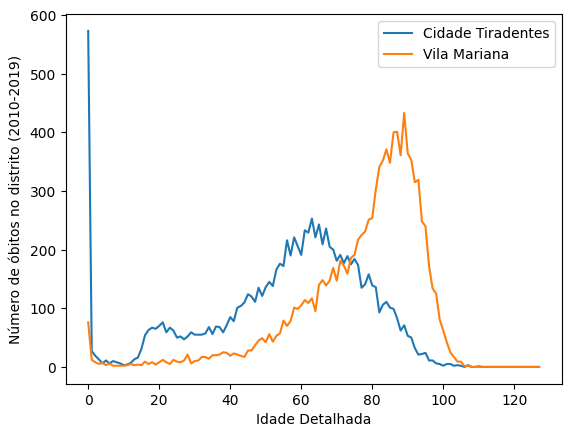

In [162]:
for distrito in ['Cidade Tiradentes', 'Vila Mariana']:
    limpo_df[distrito].plot(label=distrito)
pl.ylabel('Número de óbitos no distrito (2010-2019)')
pl.legend()
pl.show()